## Two techniques related to dummy variables operations. Dummy varaibles are the type of categorical data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dummyHouse-price.csv')

In [3]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [4]:
df.describe()

,area,price
count,13.000000,13.000000
mean,3146.153846,629230.769231
std,453.900475,57621.109914
min,2600.000000,550000.000000
25%,2800.000000,585000.000000
50%,3100.000000,615000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [11]:
lr.fit(df[['area']], df.price)

LinearRegression()

## Lets see first the relationship is linear or not.

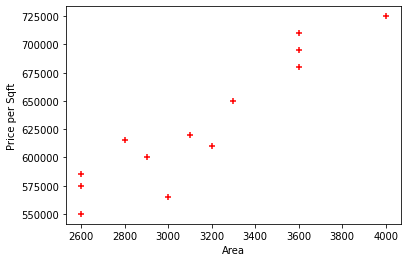

In [12]:
plt.xlabel('Area')
plt.ylabel('Price per Sqft')
plt.scatter(df[['area']], df.price, color = 'red', marker = '+')

In [13]:
dummies = pd.get_dummies(df['town'])

In [14]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [18]:
final_dataset = pd.concat([df, dummies], axis = 'columns')

In [19]:
final_dataset

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


## For dummy variavble creation. If we have cree cetegorical value then we need to take n-1 = 3-1 = 2. And drop the others

In [21]:
final_dataset.drop(['town','west windsor'], axis = 'columns', inplace=True)

In [22]:
final_dataset

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [24]:
X = final_dataset.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [25]:
y = df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [26]:
lr.fit(X,y)

LinearRegression()

In [27]:
lr.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [28]:
lr.intercept_

249790.36766292527

In [29]:
final_dataset

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [31]:
lr.predict([[3200,0,1]])

array([641534.61621157])

### Lets get the accuracy of our mobile.

In [32]:
lr.score(X,y) # More than 95% accuracy rate. So our prediction model is quite logical and perfect.

0.9573929037221873

## Now lets see about how to work on hot encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Now we will labeling our town column with label encode and then do hot coding.

In [37]:
dfle = df
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [38]:
dfle.town = le.fit_transform(dfle.town)

In [39]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


## Now we will do hot encode

In [81]:
X = df[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [82]:
y =dfle.price

In [83]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onhe = OneHotEncoder()

In [87]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)


In [93]:
X = ct.fit_transform(X)

In [94]:
X

array([[0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [97]:
X = X[:,1:]

In [98]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [99]:
lr.fit(X,y)

LinearRegression()

In [101]:
lr.predict([[1,10,3300]])

array([1054364.11524403])

## Now save the model in pickle format

In [102]:
import pickle

In [103]:
with open('dummy_pickle','wb') as f:
    dum

TypeError: dump() missing required argument 'file' (pos 2)